Naive-Bayes classifiers
----

Load the data from the KNN lab

In [6]:
import numpy as np
import pylab as plt
%matplotlib inline
trainx = np.loadtxt('trainx.csv',delimiter=',')
testx = np.loadtxt('testx.csv',delimiter=',')
traint = np.hstack((np.zeros(50,),np.ones(50,)))
testt = np.hstack((np.zeros(200,),np.ones(200,)))

Plot the data

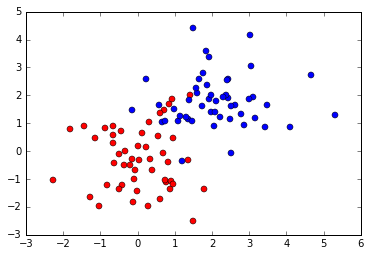

In [7]:
plt.plot(trainx[:50,0],trainx[:50,1],'ro')
plt.plot(trainx[50:,0],trainx[50:,1],'bo')

We will use Gaussian distributions for each class. For each class, we fit a Gaussian to each dimension (by compute the mean and variance). The prior for each class will be the proportion of training data in that class.

In [25]:
parameters = {}
for cl in range(2):
    data_pos = np.where(traint==cl)[0]
    class_pars = {}
    class_pars['mean'] = trainx[data_pos,:].mean(axis=0)
    class_pars['vars'] = trainx[data_pos,:].var(axis=0)
    class_pars['prior'] = 1.0*len(data_pos)/len(trainx)
    parameters[cl] = class_pars
    

Loop through the test points, computing their likelihood in each class and multiplying by the prior

In [44]:
predictions = np.zeros((400,))
for j,tx in enumerate(testx):
    un_norm_prob = np.zeros((2,))
    for cl in parameters:
        un_norm_prob[cl] = parameters[cl]['prior']
        for i,m in enumerate(parameters[cl]['mean']):
            vari = parameters[cl]['vars'][i]
            un_norm_prob[cl] *= 1.0/np.sqrt(2.0*np.pi*vari)
            un_norm_prob[cl] *= np.exp((-0.5/var)*(tx[i]-m)**2)
    norm_prob = un_norm_prob/un_norm_prob.sum()
    predictions[j] = norm_prob.argmax()


Compute the accuracy of the classifier

In [45]:
accuracy = (predictions == testt).mean()
print accuracy

0.89
